In [1]:
import scipy.io
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
from joblib import load,dump
import scipy.linalg as la

import sys
sys.path.insert(0,'../scripts/')
from processDynamic import ProcessDynamic

In [2]:
# # I saved my own model data as pickle files, but may not need
# model_output = load('../data/p14model-ocv.pkl')
model_data = load('../data/p14model-data.pkl')

In [3]:
# Note, had to resave this data in Octave like so: save -mat7-binary 'file.mat' model
data = scipy.io.loadmat('../data/P14model-ocv-mat7.mat', simplify_cells=True)

In [4]:
#data['model']['model']

In [5]:
test = ProcessDynamic(model_dir='../data/')

In [6]:
test.load_data()

In [7]:
#plt.plot(test.data[5]['script1']['time'],test.data[5]['script1']['current'])

In [8]:
test.process_DYN_step1()

25 14.531852290290429 0.9910212941308391
5 14.482598404517704 0.9874053548391215
45 14.414656461803379 0.9902808733940264


In [9]:
test.process_DYN_step2()

In [10]:
#test.model[5]['OCV'][0]

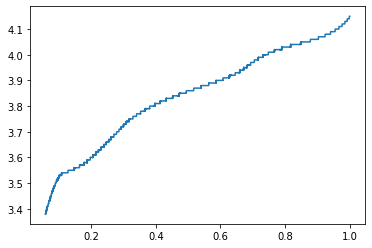

In [11]:
plt.plot(test.model[5]['Z'],test.model[5]['OCV'][0])

In [12]:
test.minfn(25,0)

25 0
25 14.531852290290429
25 0.9910212941308391
25 [0]
25 1


../scripts/processDynamic.py:237: ComplexWarning: Casting complex values to real discards the imaginary part
  vrcRaw[:,i] = np.diag(RCfact)*vrcRaw[:,i-1] + (1-RCfact)*current[i-1]


RMS error for present value of gamma = 9.190000 (mV)


In [13]:
test.minfn(5,0)

5 0
5 14.482598404517704
5 0.9874053548391215
5 [0]
5 1
RMS error for present value of gamma = 17.410000 (mV)


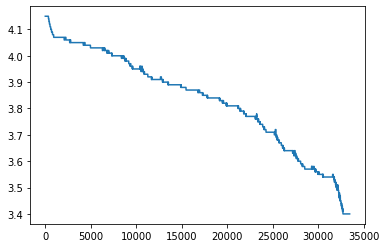

In [14]:
plt.plot(test.model[25]['vest1'])

## Test Oct2Py

In [15]:
from oct2py import octave

In [16]:
octave.addpath('/Users/matthewbohan/github/bms-specialization/course-2/scripts/')

'.:/Users/matthewbohan/github/bms-specialization/course-2/scripts:/Users/matthewbohan/opt/anaconda3/lib/python3.7/site-packages/oct2py:/Users/matthewbohan/opt/anaconda3/lib/python3.7/site-packages/octave_kernel:/usr/local/Cellar/octave/6.4.0_1/share/octave/site/m:/usr/local/Cellar/octave/6.4.0_1/share/octave/site/m/startup:/usr/local/Cellar/octave/6.4.0_1/lib/octave/6.4.0/oct/x86_64-apple-darwin20.6.0:/usr/local/Cellar/octave/6.4.0_1/share/octave/6.4.0/m:/usr/local/Cellar/octave/6.4.0_1/share/octave/6.4.0/m/audio:/usr/local/Cellar/octave/6.4.0_1/share/octave/6.4.0/m/deprecated:/usr/local/Cellar/octave/6.4.0_1/share/octave/6.4.0/m/elfun:/usr/local/Cellar/octave/6.4.0_1/share/octave/6.4.0/m/general:/usr/local/Cellar/octave/6.4.0_1/share/octave/6.4.0/m/geometry:/usr/local/Cellar/octave/6.4.0_1/share/octave/6.4.0/m/gui:/usr/local/Cellar/octave/6.4.0_1/share/octave/6.4.0/m/help:/usr/local/Cellar/octave/6.4.0_1/share/octave/6.4.0/m/image:/usr/local/Cellar/octave/6.4.0_1/share/octave/6.4.0/m/

In [17]:
verr = test.model[25]['vest1']

In [18]:
test.model[25]['vest1']

array([4.15, 4.15, 4.15, ..., 3.4 , 3.4 , 3.4 ])

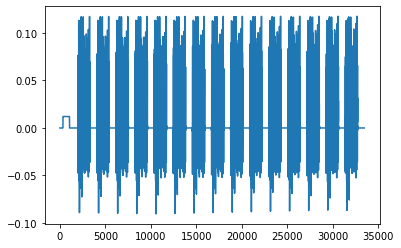

In [19]:
plt.plot(test.model[25]['test1'])

In [ ]:
plt.plot(test.model[25]['test2'])

 ...]

In [ ]:
corrected_current = test.model[25]['corrected_current']

In [ ]:
A = octave.SISOsubid(-np.diff(verr),np.diff(corrected_current),1)

In [ ]:
eigA = la.eig(np.identity(1)*A)[0]
eigA = eigA[eigA == np.conj(eigA)]
eigA = eigA[eigA > 0 and eigA < 1]

In [ ]:
RCfact = np.sort(eigA)

In [ ]:
RC = -1./np.log(RCfact)

In [ ]:
RC

In [ ]:
current = test.model[25]['current']

In [ ]:
h = 0*current

In [ ]:
vrcRaw = np.zeros((1,len(h)))

In [ ]:
vrcRaw.shape

In [ ]:
np.diag(RCfact)

In [ ]:
for i in range(1,len(current)):
    vrcRaw[:,i] = np.diag(RCfact)*vrcRaw[:,i-1] + (1-RCfact)*current[i-1]

In [ ]:
vrcRaw[0]

In [ ]:
H = [-etaik,-vrcRaw];
W = H\verr;
M=0;
M0=0;
R0 = W(1);
Rfact = W(2:end)';

In [ ]:
H = [-current,-vrcRaw.T]

In [ ]:
H \ verr

In [ ]:
from scipy.optimize import nnls

In [ ]:
test2 = np.vstack((H[0],H[1].T[0]))

In [ ]:
test2.shape

In [ ]:
solution = nnls(test2.T, verr)

In [ ]:
solution

In [ ]:
H = [-current,-vrcRaw.T]
H = np.vstack((H[0],H[1].T[0]))
W = nnls(H.T, verr)[0]
M=0;
M0=0;
R0 = W[0];
Rfact = W[1];

In [ ]:
W

In [ ]:
R0

In [ ]:
Rfact

In [ ]:
test3 = [10,99]

In [ ]:
test3[:-1]

In [ ]:
Rfact

In [ ]:
vrcRaw*Rfact.T

In [ ]:
verr = vk - vest2;